In [ ]:

%%capture
!wget https://gist.githubusercontent.com/nzhukov/97195b28ad862043511bab41e8cd7e6c/raw/d50ed3ee6232f4104a10e737020dfa485a9b5a59/web_traffic.tsv


In [ ]:
import pandas as pd

data = pd.read_csv('web_traffic.tsv', delimiter='\t', names=['hour','n_requests'])

data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 743 entries, 0 to 742
Data columns (total 2 columns):
 #   Column      Non-Null Count  Dtype  
---  ------      --------------  -----  
 0   hour        743 non-null    int64  
 1   n_requests  735 non-null    float64
dtypes: float64(1), int64(1)
memory usage: 11.7 KB


In [ ]:
data =data.dropna()

input_var = 'hour'
target_var = 'n_requests'

hours_data = data[input_var]
requests_data = data[target_var]
data.info()

<class 'pandas.core.frame.DataFrame'>
Index: 735 entries, 0 to 742
Data columns (total 2 columns):
 #   Column      Non-Null Count  Dtype  
---  ------      --------------  -----  
 0   hour        735 non-null    int64  
 1   n_requests  735 non-null    float64
dtypes: float64(1), int64(1)
memory usage: 17.2 KB


In [ ]:
input_var='hour'
target_var='n_requests'

hours=data[input_var]
requests=data[target_var]

In [ ]:
%matplotlib inline

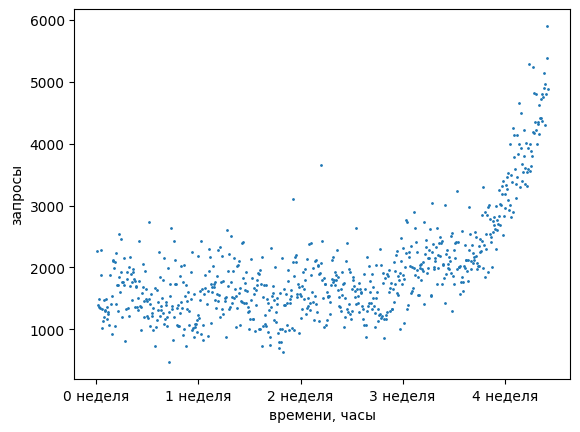

In [ ]:
import numpy as np
import matplotlib.pyplot as plt
from sklearn.metrics import r2_score, mean_squared_error, mean_absolute_error
plt.scatter(hours,requests, s=1)
plt.xlabel('времени, часы')

plt.ylabel('запросы')

plt.xticks([w*7*24 for w in range(6)],[f"{i} неделя" for i in range (6)])

plt.autoscale(tight=False)
plt.show()

In [ ]:
f1p, residuals, rank, sv, rcond=np.polyfit(hours, requests, 1, full = True)

fx=np.poly1d(f1p)

f2p, residuals, rank, sv, rcond=np.polyfit(hours, requests, 2, full = True)
f2x=np.poly1d(f2p)


f3p, residuals, rank, sv, rcond=np.polyfit(hours, requests, 3, full = True)
f3x=np.poly1d(f3p)


f5p, residuals, rank, sv, rcond=np.polyfit(hours, requests, 5, full = True)
f5x=np.poly1d(f5p)

f8p, residuals, rank, sv, rcond=np.polyfit(hours, requests, 8, full = True)
f8x=np.poly1d(f8p)

f10p, residuals, rank, sv, rcond=np.polyfit(hours, requests, 10, full = True)
f10x=np.poly1d(f10p)

f20p, residuals, rank, sv, rcond=np.polyfit(hours, requests, 20, full = True)
f20x=np.poly1d(f20p)


print(f2p)
print(f2x([1]))
print(f2x)

print(f3p)
print(f3x([1]))
print(f3x)

print(f5x)
print(f5x([1]))

print(f8x)
print(f8x([1]))

print(f10x)
print(f10x([1]))

print(f20x)
print(f20x([1]))

[ 1.05322215e-02 -5.26545650e+00  1.97476082e+03]
[1969.50589268]
         2
0.01053 x - 5.265 x + 1975
[ 3.04960132e-05 -2.35893797e-02  4.94226019e+00  1.33328797e+03]
[1338.20666682]
          3           2
3.05e-05 x - 0.02359 x + 4.942 x + 1333
           5             4             3           2
2.165e-10 x - 3.134e-07 x + 0.0001638 x - 0.03415 x + 2.248 x + 1536
[1538.37436709]
            8             7             6             5             4
-2.477e-17 x + 7.602e-14 x - 9.516e-11 x + 6.258e-08 x - 2.314e-05 x
             3          2
 + 0.004765 x - 0.5028 x + 21.86 x + 1341
[1362.08094489]
           10             9             8             7             6
-3.74e-22 x  + 1.365e-18 x - 2.143e-15 x + 1.899e-12 x - 1.046e-09 x
              5             4           3          2
 + 3.709e-07 x - 8.456e-05 x + 0.01192 x - 0.9416 x + 33.37 x + 1264
[1296.65264082]
           20             19             18             17
4.831e-47 x  - 3.183e-43 x  + 8.872e-40 x  - 1.315e-3

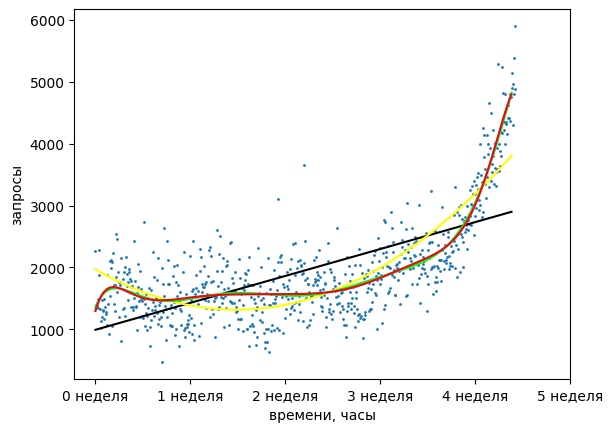

In [ ]:
import matplotlib.pyplot as plt

plt.scatter(hours,requests, s=1)


f1x=np.linspace(1,hours [len(hours)], len(hours))
f1y=fx(f1x)
#print (f1x)
plt.plot(f1x, f1y, color='black')

f0x=np.linspace(1,hours [len(hours)], len(hours))
f2y=f2x(f0x)
#print (f2x)
plt.plot(f0x, f2y, color='yellow')

f7x=np.linspace(1,hours [len(hours)], len(hours))
f8y=f8x(f7x)
#print (f2x)
plt.plot(f7x, f8y, color='lime')


f9x=np.linspace(1,hours [len(hours)], len(hours))
f10y=f10x(f9x)
#print (f2x)
plt.plot(f9x, f10y, color='cyan')


f19x=np.linspace(1,hours [len(hours)], len(hours))
f20y=f10x(f19x)
#print (f2x)
plt.plot(f19x, f20y, color='red')

plt.xlabel('времени, часы')

plt.ylabel('запросы')

plt.xticks([w*7*24 for w in range(6)],[f"{i} неделя" for i in range (6)])

#plt.autoscale(tight=False)
plt.show()

Подсчет ошибки

In [ ]:
f1x_mse=mean_squared_error(requests, fx(hours))
f1x_rmse=mean_squared_error(requests, fx(hours), squared=False)
f1x_mae=mean_absolute_error(requests, fx(hours))


f2x_mse=mean_squared_error(requests, f2x(hours))
f2x_rmse=mean_squared_error(requests, f2x(hours), squared=False)
f2x_mae=mean_absolute_error(requests, f2x(hours))




f8x_mse=mean_squared_error(requests, f8x(hours))
f8x_rmse=mean_squared_error(requests, f8x(hours), squared=False)
f8x_mae=mean_absolute_error(requests, f8x(hours))

f10x_mse=mean_squared_error(requests, f10x(hours))
f10x_rmse=mean_squared_error(requests, f10x(hours), squared=False)
f10x_mae=mean_absolute_error(requests, f10x(hours))

f20x_mse=mean_squared_error(requests, f20x(hours))
f20x_rmse=mean_squared_error(requests, f20x(hours), squared=False)
f20x_mae=mean_absolute_error(requests, f20x(hours))

print(f1x_mae)
print(f2x_rmse)
print(f8x_rmse)
print(f20x_rmse)

# сократить числа

504.88101037565264
494.84898799804853
408.0375430587484
387.78584635471515


In [ ]:
min_index_train, max_index_train=0, int(len(hours)*0.7)
min_index_test, max_index_test=max_index_train+1, len(hours)

new_min_index_train, index_train= max_index_train+1, int(min_index_test+(int(len(hours)*0.3)*0.7))






print(max_index_train)

print(max_index_test)

print(new_min_index_train, index_train)







514
735
515 669


In [ ]:
train_hours=hours[new_min_index_train:index_train:1]
train_requests=requests[new_min_index_train:index_train:1]

print(len(train_requests))

print(len(train_hours))


f1p, residuals, rank, sv, rcond=np.polyfit(train_hours, train_requests, 1, full = True)

f2p, residuals, rank, sv, rcond=np.polyfit(train_hours, train_requests, 2, full = True)

f3p, residuals, rank, sv, rcond=np.polyfit(train_hours, train_requests, 3, full = True)


f1x=np.poly1d(f1p)

f2x=np.poly1d(f2p)

f3x=np.poly1d(f3p)



print(f1x)

print(f2x)

print(f3x)

f1x_mae=mean_absolute_error(requests, fx(hours))

154
154
 
5.981 x - 1274
         2
0.09327 x - 106 x + 3.217e+04
          3         2
0.001216 x - 2.097 x + 1205 x - 2.285e+05


In [ ]:
from sklearn.metrics import r2_score, mean_squared_error
fx_1 = np.poly1d(f1p)
r2_array_1 = []  # здесь будут храниться значения точности
r2_array_1.append(r2_score(requests_data_2, fx_1(hours_data_2)))
rmse = mean_squared_error(requests_data_2,fx_1(hours_data_2), squared=False)
mse = mean_squared_error(requests_data_2,fx_1(hours_data_2), squared=True)
print(r2_array_1, mse, rmse)

fx_2 = np.poly1d(f2p)
r2_array_1 = []  # здесь будут храниться значения точности
r2_array_1.append(r2_score(requests_data_2, fx_2(hours_data_2)))
rmse = mean_squared_error(requests_data_2,fx_2(hours_data_2), squared=False)
mse = mean_squared_error(requests_data_2,fx_2(hours_data_2), squared=True)
print(r2_array_1, mse, rmse)

fx_3 = np.poly1d(f3p)
r2_array_1 = []  # здесь будут храниться значения точности
r2_array_1.append(r2_score(requests_data_2, fx_3(hours_data_2)))
rmse = mean_squared_error(requests_data_2,fx_3(hours_data_2), squared=False)
mse = mean_squared_error(requests_data_2,fx_3(hours_data_2), squared=True)
print(r2_array_1, mse, rmse)


def mean_squared_error(Y, _Y):
  pass

NameError: name 'np' is not defined

In [ ]:
train_hours=hours[min_index_train:max_index_train:1]
train_requests=requests[min_index_train:max_index_train:1]

f1p, residuals, rank, sv, rcond=np.polyfit(train_hours, train_requests, 1, full = True)
f1x=np.poly1d(f1p)

f2x=np.poly1d(f2p)

f3x=np.poly1d(f3p)

print(len(train_requests))


print(f1x)

print(f2x)

print(f3x)

f1x_mae=mean_absolute_error(requests, fx(hours))


514
 
0.3285 x + 1496
         2
0.09327 x - 106 x + 3.217e+04
          3         2
0.001216 x - 2.097 x + 1205 x - 2.285e+05


![Средняя квадратичная ошибка](https://i2.wp.com/miro.medium.com/1*NP0FvaTh_V00SS6HGty27w.png)

In [ ]:
train_border = 3.5
final_border = 4.2

train_data  = int(train_border * 7 * 24) # 588
final_border = int(final_border * 7 * 24)

# print(divider)
# train set
hours_data_1, requests_data_1 = hours_data[train_data:final_border], requests_data[train_data:final_border]
# test set
hours_data_2, requests_data_2 = hours_data[final_border:], requests_data[final_border:]



print(train_data)
print(final_border)

print(requests_data_1.shape)
print(requests_data_2.shape)

# print(588+84)

588
705
(117,)
(30,)


In [ ]:
f2p_1, residuals_1, rank_1, sv_1, rcond_1 = np.polyfit(hours_data_1, requests_data_1, 1, full=True)

f2p_2, residuals_2, rank_2, sv_2, rcond_2 = np.polyfit(hours_data_1, requests_data_1, 2, full=True)

f2p_3, residuals_3, rank_3, sv_3, rcond_3 = np.polyfit(hours_data_1, requests_data_1, 3, full=True)

In [ ]:
from sklearn.metrics import r2_score, mean_squared_error
fx_1 = np.poly1d(f2p_1)
r2_array_1 = []  # здесь будут храниться значения точности
r2_array_1.append(r2_score(requests_data_2, fx_1(hours_data_2)))
rmse = mean_squared_error(requests_data_2,fx_1(hours_data_2), squared=False)
mse = mean_squared_error(requests_data_2,fx_1(hours_data_2), squared=True)
print(r2_array_1, mse, rmse)

fx_2 = np.poly1d(f2p_2)
r2_array_2 = []  # здесь будут храниться значения точности
r2_array_2.append(r2_score(requests_data_2, fx_2(hours_data_2)))
rmse = mean_squared_error(requests_data_2,fx_2(hours_data_2), squared=False)
mse = mean_squared_error(requests_data_2,fx_2(hours_data_2), squared=True)
print(r2_array_2, mse, rmse)

fx_3 = np.poly1d(f2p_3)
r2_array_3 = []  # здесь будут храниться значения точности
r2_array_3.append(r2_score(requests_data_2, fx_3(hours_data_2)))
rmse = mean_squared_error(requests_data_2,fx_3(hours_data_2), squared=False)
mse = mean_squared_error(requests_data_2,fx_3(hours_data_2), squared=True)
print(r2_array_3, mse, rmse)


[-1.2764759423228256] 955910.7277024637 977.7068720748892
[-0.01827650721187335] 427582.5713396405 653.8979823639468
[0.444750208019569] 233153.8949482943 482.86011944277845


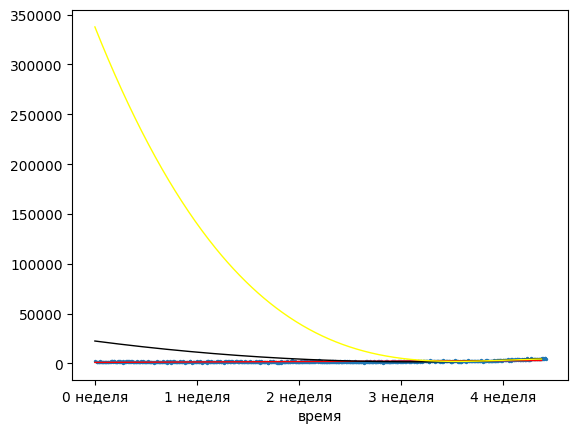

In [ ]:
import matplotlib.pyplot as plt

plt.scatter(hours_data, requests_data, s=2)
plt.xlabel('время')

plt.xticks([w*7*24 for w in range(6)],["%i неделя" %w for w in range(6)])

# отобразим модель #1
f2x = np.linspace(0, hours_data[len(hours_data)], len(hours_data))
f2y = fx(f2x)
plt.plot(f2x, f2y, linewidth=1.0, color='red')

f2x = np.linspace(0, hours_data[len(hours_data)], len(hours_data))
f2y = fx_2(f2x)
plt.plot(f2x, f2y, linewidth=1.0, color='black')


f2x = np.linspace(0, hours_data[len(hours_data)], len(hours_data))
f2y = fx_3(f2x)
plt.plot(f2x, f2y, linewidth=1.0, color='yellow')



plt.autoscale(tight=False)

plt.show()

In [ ]:
divider = int(3.5*7*24)
divider2 = int(4.1*7*24)

hours_data_1, requests_data_1 = hours_data[:divider], requests_data[:divider]
hours_data_2, requests_data_2 = hours_data[divider:divider2], requests_data[divider:divider2]

hours_data_test, requests_data_test = hours_data[divider2:], requests_data[divider2:]



print(requests_data_1.shape, requests_data_2.shape, requests_data_test.shape)

(588,) (100,) (47,)


In [ ]:
f20p, residuals, rank, sv, rcond = np.polyfit(hours_data_2, requests_data_2, 20, full=True)
f20 = np.poly1d(f20p)
rmse_1 = mean_squared_error(requests_data_2,f20(hours_data_2), squared=False)
rmse_2 = mean_squared_error(requests_data_test,f20(hours_data_test), squared=False)
print(f"RMSE (для данных c 3.5 недели по 4.1 недели)= {rmse:.5}")
print(f"RMSE (только для данных с 3.5 недели)= {rmse_2:.5}")

fp, residuals, rank, sv, rcond = np.polyfit(hours_data_2, requests_data_2, 1, full=True)
f = np.poly1d(fp)
rmse_1 = mean_squared_error(requests_data_2,f(hours_data_2), squared=False)
rmse_2 = mean_squared_error(requests_data_test,f(hours_data_test), squared=False)

print(f"RMSE (только для данных с 3.5 недели)= {rmse_2:.5}")


f2p, residuals, rank, sv, rcond = np.polyfit(hours_data_2, requests_data_2, 2, full=True)
f2 = np.poly1d(f2p)
rmse_1 = mean_squared_error(requests_data_2,f2(hours_data_2), squared=False)
rmse_2 = mean_squared_error(requests_data_test,f2(hours_data_test), squared=False)

print(f"RMSE (только для данных с 3.5 недели)= {rmse_2:.5}")

f3p, residuals, rank, sv, rcond = np.polyfit(hours_data_2, requests_data_2, 3, full=True)
f3 = np.poly1d(f3p)
rmse_1 = mean_squared_error(requests_data_2,f3(hours_data_2), squared=False)
rmse_2 = mean_squared_error(requests_data_test,f3(hours_data_test), squared=False)

print(f"RMSE (только для данных с 3.5 недели)= {rmse_2:.5}")

RMSE (для данных c 3.5 недели по 4.1 недели)= 507.95
RMSE (только для данных с 3.5 недели)= 4.6657e+06
RMSE (только для данных с 3.5 недели)= 498.32
RMSE (только для данных с 3.5 недели)= 722.12
RMSE (только для данных с 3.5 недели)= 1797.7
